# LIQUIDITY POOL PRICE IMPACT (SLIPPAGE) MODEL

Here we will modelate the slippage, also known in the crypto AMM crypto exchanges as price impact, that trades will have over the token pair price.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Lets define an array of liquidity pool USD sizes to be able to iterate through the AMM model

LIQUIDITY_POOL_USD_SIZE = []
for size in range(10000,201000,10000):
  LIQUIDITY_POOL_USD_SIZE.append(size)
    
'''I assume that the amount of Vincis in the pool is in USD initial value the same as USD pool size, 
this means the shares in the pool are 50/50 Vinci/USD in USD terms'''

Initial_VINCI_price = 0.06
LIQUIDITY_POOL_VINCI_SIZE = []
for size in range(10000,201000,10000):
    LIQUIDITY_POOL_VINCI_SIZE.append(size/Initial_VINCI_price)

In [3]:
#Lets define an array of potential trades and the price impact they will create

TRADE_USD_SIZE = []
for size in range(100,50010,100):
  TRADE_USD_SIZE.append(size)

In [4]:
#Create a dataframe with the different sizes and am ounts of Vinci tokens
LIQUIDITY = pd.DataFrame(list(zip(LIQUIDITY_POOL_USD_SIZE, LIQUIDITY_POOL_VINCI_SIZE)),
               columns =['LIQUIDITY_POOL_USD_SIZE', 'LIQUIDITY_POOL_VINCI_SIZE'])

## Uniswap - constant type formula

In [5]:
#The uniswap formula obeys a constant TOKEN_A_AMOUNT * TOKEN_B_AMOUNT = CONSTANT

def UNISWAP_formula(token_b_pool_size, constant_product):
    token_a_pool_size = constant_product/token_b_pool_size    
    return token_a_pool_size

In [6]:
#Now we iterate through the AMM formula to define the amount of traded tokens you get.

In [7]:
i = 0
PRICE_IMPACT_ARRAY = []

for i in range(0,len(LIQUIDITY)):
    LIQUIDITY_loop = LIQUIDITY.iloc[i]
    j = 0
    for j in range(0,len(TRADE_USD_SIZE)): 
        TRADE = TRADE_USD_SIZE[j]
        constant_product=LIQUIDITY_loop['LIQUIDITY_POOL_USD_SIZE']*LIQUIDITY_loop['LIQUIDITY_POOL_VINCI_SIZE']
        token_b_pool_size=LIQUIDITY_loop['LIQUIDITY_POOL_USD_SIZE']+TRADE
        token_a_pool_size = UNISWAP_formula(token_b_pool_size,constant_product)
        NEW_PRICE = TRADE/(LIQUIDITY_loop['LIQUIDITY_POOL_VINCI_SIZE']-token_a_pool_size)
        PRICE_IMPACT = NEW_PRICE/(Initial_VINCI_price)-1
        RESULTS =  [constant_product,LIQUIDITY_loop['LIQUIDITY_POOL_USD_SIZE'],LIQUIDITY_loop['LIQUIDITY_POOL_VINCI_SIZE'],LIQUIDITY_loop['LIQUIDITY_POOL_VINCI_SIZE']-token_a_pool_size, TRADE, PRICE_IMPACT]
        PRICE_IMPACT_ARRAY.append(RESULTS)     

In [8]:
PRICE_IMPACT_DF = pd.DataFrame(PRICE_IMPACT_ARRAY, columns = ['CONSTANT','LIQUIDITY_POOL_USD_SIZE','LIQUIDITY_POOL_VINCI_SIZE','VINCI_TRADED','TRADE_VOLUME_USD','PRICE_IMPACT'])

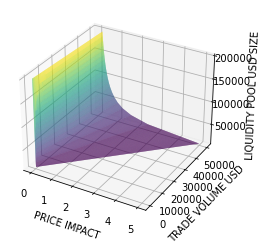

In [9]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(PRICE_IMPACT_DF['PRICE_IMPACT'], 
                PRICE_IMPACT_DF['TRADE_VOLUME_USD'], 
                PRICE_IMPACT_DF['LIQUIDITY_POOL_USD_SIZE'],cmap='viridis', edgecolor='none');
ax.set_xlabel('PRICE IMPACT')
ax.set_ylabel('TRADE VOLUME USD')
ax.set_zlabel('LIQUIDITY POOL USD SIZE');

In [10]:
from IPython.core.display import display, HTML
import json
import numpy as np

def plot3D(X, Y, Z, height=600, xlabel = "X", ylabel = "Y", zlabel = "Z", initialCamera = None):

    options = {
        "width": "100%",
        "style": "surface",
        "showPerspective": True,
        "showGrid": True,
        "showShadow": False,
        "keepAspectRatio": True,
        "height": str(height) + "px"
    }

    if initialCamera:
        options["cameraPosition"] = initialCamera
        
    data = [ {"x": X[y,x], "y": Y[y,x], "z": Z[y,x]} for y in range(X.shape[0]) for x in range(X.shape[1]) ]
    visCode = r"""
       <link href="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.css" type="text/css" rel="stylesheet" />
       <script src="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.js"></script>
       <div id="pos" style="top:0px;left:0px;position:absolute;"></div>
       <div id="visualization"></div>
       <script type="text/javascript">
        var data = new vis.DataSet();
        data.add(""" + json.dumps(data) + """);
        var options = """ + json.dumps(options) + """;
        var container = document.getElementById("visualization");
        var graph3d = new vis.Graph3d(container, data, options);
        graph3d.on("cameraPositionChange", function(evt)
        {
            elem = document.getElementById("pos");
            elem.innerHTML = "H: " + evt.horizontal + "<br>V: " + evt.vertical + "<br>D: " + evt.distance;
        });
       </script>
    """
    htmlCode = "<iframe srcdoc='"+visCode+"' width='100%' height='" + str(height) + "px' style='border:0;' scrolling='no'> </iframe>"
    display(HTML(htmlCode))

In [11]:
X, Y = np.meshgrid(np.linspace(100,50000,len(TRADE_USD_SIZE)),np.linspace(10000,200000,len(LIQUIDITY)))

np.seterr(divide='ignore', invalid='ignore')

Z = (X/(Y/Initial_VINCI_price-UNISWAP_formula(X+Y,constant_product=Y*Y/Initial_VINCI_price)))/(Initial_VINCI_price)-1
plot3D(X, Y, Z)

C:\Users\Cachorrito\anaconda3\lib\site-packages\IPython\core\display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
